<a href="https://colab.research.google.com/github/mounisha123-ram/Multiple-Disease-Prediction/blob/main/Project4_Liver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import pickle
from google.colab import files

In [ ]:
df=pd.read_csv('/content/indian_liver_patient - indian_liver_patient.csv')
pd.set_option('display.max_columns', None)

In [ ]:
df.shape

(583, 11)

In [ ]:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [ ]:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Status
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,1,1.0,0.3,216,21,24,7.3,4.4,1.50,0


In [ ]:
print(df['Dataset'].unique())
print(df['Dataset'].value_counts())

[1 2]
Dataset
1    416
2    167
Name: count, dtype: int64


In [ ]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
#checking missing values
df.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


In [ ]:
#To see the null value rows
df[df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [ ]:
df.shape

(583, 11)

In [ ]:
#Drop All Rows with Any Null Values
df.dropna(inplace=True)
df.shape

(579, 11)

In [ ]:
#to see the total count of negative values in our datset
(df.select_dtypes(include='number') < 0).sum().sum()

np.int64(0)

In [ ]:
#checking duplicates
df.duplicated().sum()

np.int64(13)

In [ ]:
#to view the duplicates

df[df.duplicated()]  # Displays duplicate rows

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


In [ ]:
#Drop Duplicates

df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         566 non-null    int64  
 1   Gender                      566 non-null    object 
 2   Total_Bilirubin             566 non-null    float64
 3   Direct_Bilirubin            566 non-null    float64
 4   Alkaline_Phosphotase        566 non-null    int64  
 5   Alamine_Aminotransferase    566 non-null    int64  
 6   Aspartate_Aminotransferase  566 non-null    int64  
 7   Total_Protiens              566 non-null    float64
 8   Albumin                     566 non-null    float64
 9   Albumin_and_Globulin_Ratio  566 non-null    float64
 10  Dataset                     566 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.1+ KB


In [ ]:
#rename the column because the target colmn doesnt make sense
df.rename(columns={'Dataset': 'Status'}, inplace=True)
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Status'],
      dtype='object')

In [ ]:
#encoding because atrget column confuses
#dataset 1-->represent liver disese present 2-->means healthy
df['Status'] = df['Status'].map({1: 1, 2: 0}) #0--> helathy   1--> liver disese present

In [ ]:
df.dtypes

,0
Age,int64
Gender,object
Total_Bilirubin,float64
Direct_Bilirubin,float64
Alkaline_Phosphotase,int64
Alamine_Aminotransferase,int64
Aspartate_Aminotransferase,int64
Total_Protiens,float64
Albumin,float64
Albumin_and_Globulin_Ratio,float64


In [ ]:
df.shape

(566, 11)

# **Eda**

In [ ]:
# List of numerical columns from your dataframe
numerical_cols = [
    'Age',
    'Total_Bilirubin',
    'Direct_Bilirubin',
    'Alkaline_Phosphotase',
    'Alamine_Aminotransferase',
    'Aspartate_Aminotransferase',
    'Total_Protiens',
    'Albumin',
    'Albumin_and_Globulin_Ratio'
]

# Plot box plots for each numerical column
for col in numerical_cols:
    fig = px.box(df, y=col, title=f' Box Plot of {col}', points="all", template="plotly_white")
    fig.update_layout(yaxis_title=col, title_x=0.5)
    fig.show()

In [ ]:
# List of numerical columns
numerical_cols = [
    'Age',
    'Total_Bilirubin',
    'Direct_Bilirubin',
    'Alkaline_Phosphotase',
    'Alamine_Aminotransferase',
    'Aspartate_Aminotransferase',
    'Total_Protiens',
    'Albumin',
    'Albumin_and_Globulin_Ratio'
]

# Plot histograms with rug plot
for col in numerical_cols:
    fig = px.histogram(
        df,
        x=col,
        title=f'Histogram of {col}',
        marginal="rug",
        nbins=30,
        template="plotly_white"
    )
    fig.update_layout(xaxis_title=col, title_x=0.5)
    fig.show()

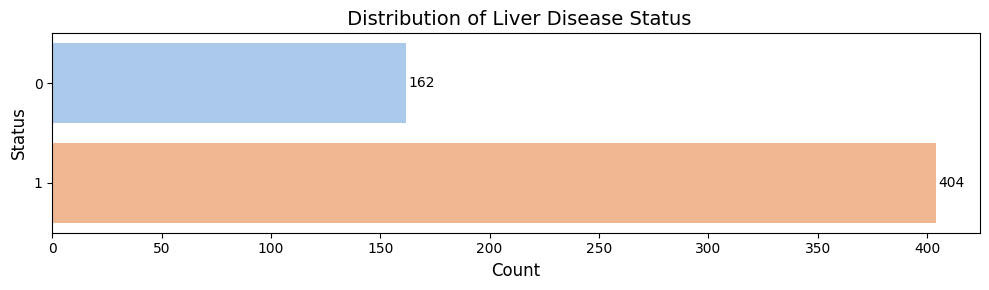

In [ ]:
# Set figure size
plt.figure(figsize=(10, 3))

# Create the countplot for the 'status' column
ax = sns.countplot(y='Status', data=df, palette='pastel')

# Set titles and labels
plt.title(" Distribution of Liver Disease Status", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Status", fontsize=12)

# Add count labels to the bars
for p in ax.patches:
    count = int(p.get_width())
    ax.text(p.get_width() + 1, p.get_y() + p.get_height() / 2, count, va='center', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

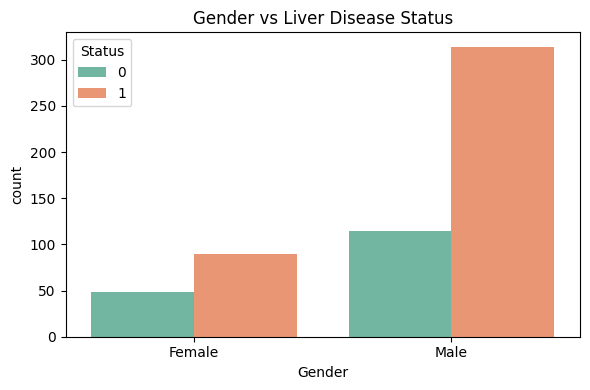

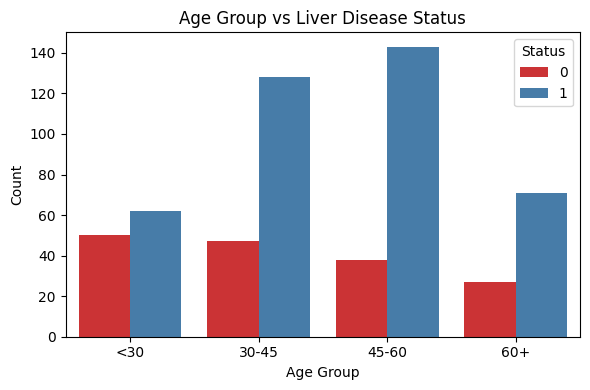

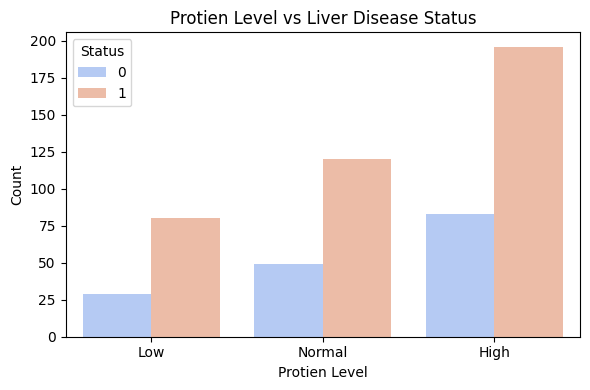

In [ ]:
#Gender vs Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Status', data=df, palette='Set2')
plt.title("Gender vs Liver Disease Status")
plt.legend(title='Status', loc='best')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#Binned Age Groups vs Status
# Create Age bins
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 45, 60, 100], labels=['<30', '30-45', '45-60', '60+'])

plt.figure(figsize=(6, 4))
sns.countplot(x='Age_Group', hue='Status', data=df, palette='Set1')
plt.title("Age Group vs Liver Disease Status")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title='Status', loc='best')
plt.tight_layout()
plt.show()


#Total Proteins (binned) vs Status
# Bin Total_Proteins into categories
df['Protien_Level'] = pd.cut(df['Total_Protiens'], bins=[0, 5.5, 6.5, 8.5],
                             labels=['Low', 'Normal', 'High'])

plt.figure(figsize=(6, 4))
sns.countplot(x='Protien_Level', hue='Status', data=df, palette='coolwarm')
plt.title("Protien Level vs Liver Disease Status")
plt.xlabel("Protien Level")
plt.ylabel("Count")
plt.legend(title='Status', loc='best')
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Status', 'Age_Group', 'Protien_Level'],
      dtype='object')

In [ ]:
df.drop('Age_Group', axis=1, inplace=True)
df.drop('Protien_Level', axis=1, inplace=True)

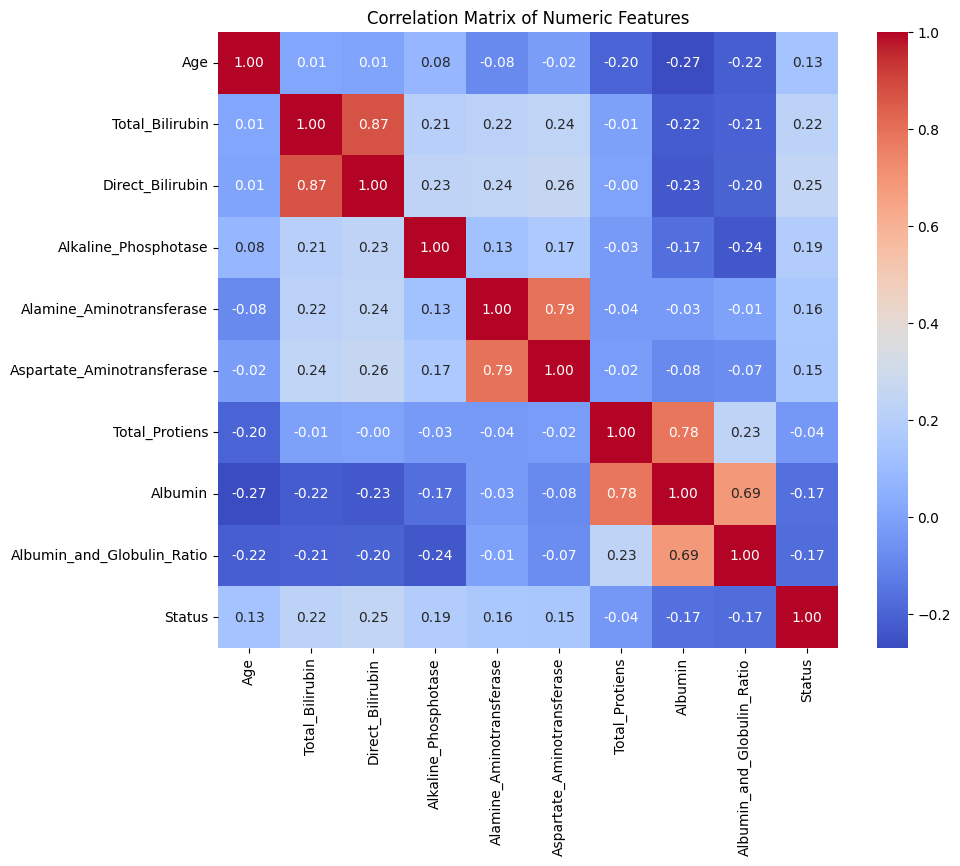

In [ ]:
# Calculate correlation matrix only for numeric columns
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [ ]:
#download cleaned csv file
from google.colab import files

# Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_liver_data.csv', index=False)

# Download the file
#files.download('cleaned_liver_data.csv')

# **Encoding**

In [ ]:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Status
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,0


In [ ]:
df.dtypes

,0
Age,int64
Gender,object
Total_Bilirubin,float64
Direct_Bilirubin,float64
Alkaline_Phosphotase,int64
Alamine_Aminotransferase,int64
Aspartate_Aminotransferase,int64
Total_Protiens,float64
Albumin,float64
Albumin_and_Globulin_Ratio,float64


In [ ]:
df.select_dtypes(exclude=['int64',"float64"])

,Gender
0,Female
1,Male
2,Male
3,Male
4,Male
...,...
578,Male
579,Male
580,Male
581,Male


In [ ]:
# Initialize the label encoder
le = LabelEncoder()
# Fit and transform the Gender column
df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
df['Status'].value_counts()

,count
Status,
1,404
0,162


# **Ml Model**

In [ ]:
#Features and Target
X = df.drop('Status', axis=1)
y = df['Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

#Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train_smote)

# Evaluation
y_pred = log_model.predict(X_test_scaled)
print("📋 Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.1f} %")

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.94      0.70        33
           1       0.97      0.70      0.81        81

    accuracy                           0.77       114
   macro avg       0.76      0.82      0.76       114
weighted avg       0.85      0.77      0.78       114

Accuracy: 77.2 %


# **Tried Other Models :-**

🎯 Logistic Regression - Accuracy: 77.19%
📈 Logistic Regression - ROC AUC Score: 0.86

🎯 Random Forest - Accuracy: 71.93%
📈 Random Forest - ROC AUC Score: 0.80

🎯 Support Vector Machine - Accuracy: 71.05%
📈 Support Vector Machine - ROC AUC Score: 0.84

🎯 XGBoost - Accuracy: 73.68%
📈 XGBoost - ROC AUC Score: 0.75

In [ ]:
# Cross-validation using the original (scaled + SMOTE) training data
cv_scores = cross_val_score(log_model, X_train_scaled, y_train_smote, cv=5, scoring='accuracy')

print("📊 Cross-Validation Scores (Accuracy):", cv_scores)
print(f"✅ Mean Accuracy: {cv_scores.mean():.2f}")
print(f"📉 Standard Deviation: {cv_scores.std():.2f}")

📊 Cross-Validation Scores (Accuracy): [0.67692308 0.6744186  0.71317829 0.70542636 0.65891473]
✅ Mean Accuracy: 0.69
📉 Standard Deviation: 0.02


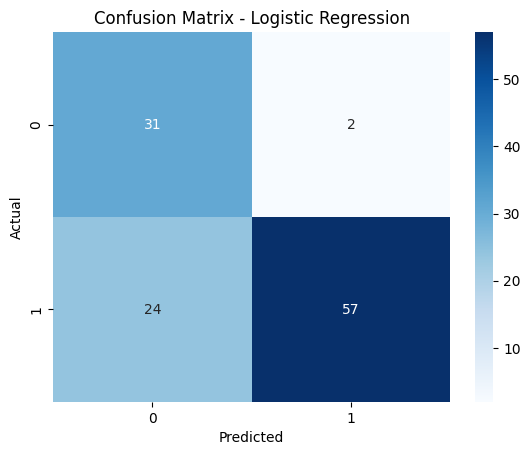

In [ ]:
# 📊 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


📈 ROC AUC Score: 0.8634


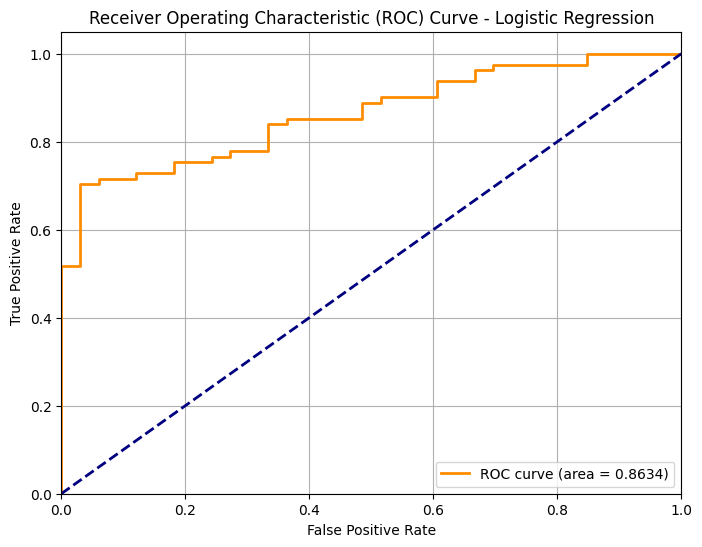

In [ ]:
#AUC → Area Under the Curve  ROC → Receiver Operating Characteristic
# Predict probabilities
y_pred_proba = log_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"📈 ROC AUC Score: {roc_auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# Save the Logistic Regression model
with open('liver_model.pkl', 'wb') as model_file:
    pickle.dump(log_model, model_file)

# Save the StandardScaler
with open('liver_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Download the model file
files.download('liver_model.pkl')
files.download('liver_scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save scaled test data
pd.DataFrame(X_test_scaled).to_csv("X_liver_scaled.csv", index=False)

# Save test labels
pd.DataFrame(y_test, columns=['Status']).to_csv("y_liver_test.csv", index=False)

files.download('X_liver_scaled.csv')
files.download('y_liver_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                      Feature  Percentage Importance
5    Alamine_Aminotransferase              29.701155
3            Direct_Bilirubin              16.174640
6  Aspartate_Aminotransferase              14.794397
8                     Albumin               9.376625
7              Total_Protiens               9.221804
0                         Age               7.371784
4        Alkaline_Phosphotase               4.161132
9  Albumin_and_Globulin_Ratio               3.149498
2             Total_Bilirubin               3.139199
1                      Gender               2.909766


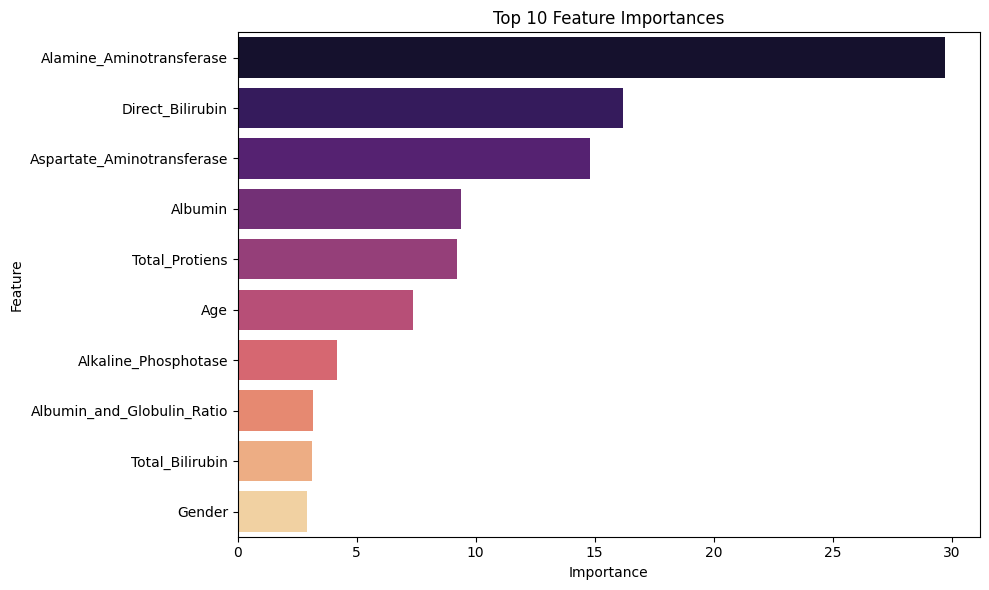

In [ ]:
# Step 1: Get feature names and coefficients
feature_names = X.columns
coefficients = log_model.coef_[0]  # For binary classification

# Step 2: Create a DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Absolute Importance': abs(coefficients)
})

# Step 3: Calculate percentage importance
total_importance = importance_df['Absolute Importance'].sum()

# Check to avoid divide by zero
if total_importance != 0:
    importance_df['Percentage Importance'] = (
        importance_df['Absolute Importance'] / total_importance
    ) * 100
else:
    importance_df['Percentage Importance'] = 0

# Step 4: Sort by importance
importance_df = importance_df.sort_values(by='Percentage Importance', ascending=False)

# Step 5: Display the DataFrame
print(importance_df[['Feature', 'Percentage Importance']].head(10))

# Step 6: Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Percentage Importance',
    y='Feature',
    data=importance_df.head(10),
    palette='magma'
)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],         # Inverse of regularization strength
    'penalty': ['l1', 'l2'],              # Regularization types
    'solver': ['liblinear']               # 'liblinear' supports both l1 and l2
}

# Initialize Logistic Regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=log_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)

# Fit on training data (already SMOTEd and scaled)
grid_search.fit(X_train_scaled, y_train_smote)

# Best parameters and score
print("✅ Best Parameters:", grid_search.best_params_)
print(f"🎯 Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")

# Evaluate the best model on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("📋 Classification Report on Test Data:\n", classification_report(y_test, y_pred))
print(f"🎯 Test Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
✅ Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
🎯 Best Cross-Validation Accuracy: 0.70
📋 Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.52      0.97      0.68        33
           1       0.98      0.64      0.78        81

    accuracy                           0.74       114
   macro avg       0.75      0.81      0.73       114
weighted avg       0.85      0.74      0.75       114

🎯 Test Accuracy: 73.68%
